In [5]:
import numpy as np
import matplotlib.pyplot as plt

from simulation import Simulation
from augmentation_pipeline import AugmentationPipeline

First, we identiy all files in the directory.

In [ ]:
training_data = range(1, 80+1)

##### Steps
1. Create a simulation object
2. Create a pipeline. This pipeline is randomized upon creation.
3. Create a new simulation object from this pipeline.
4. Check if the new simulation object is not the same as the original (by random chance).
    - If it is the same, try again.
5. From each simulation, create 4 new (augmented simulations).
6. Save the simulations.

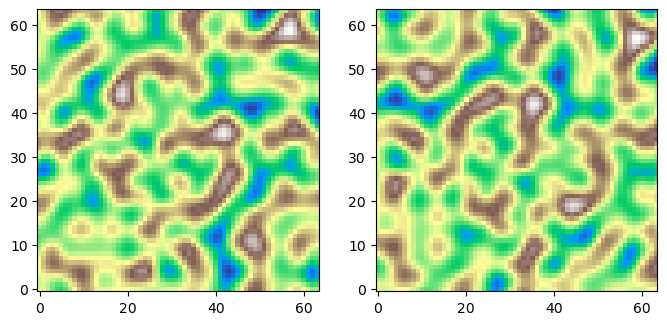

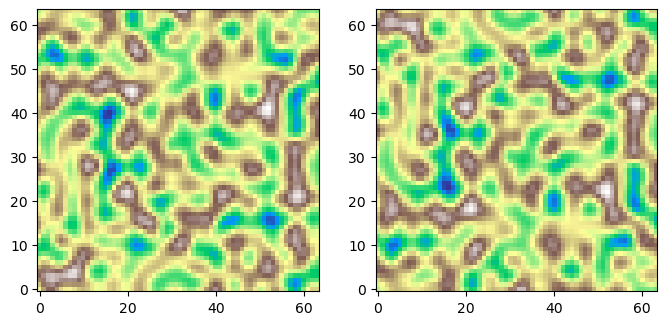

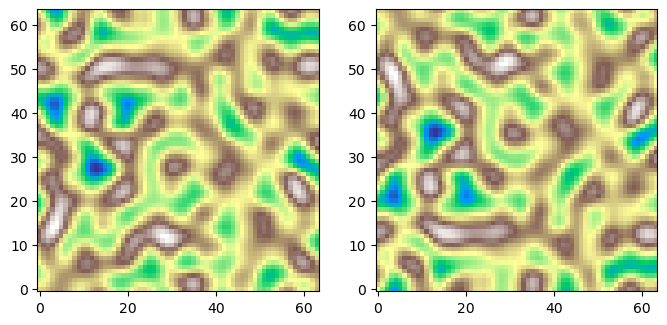

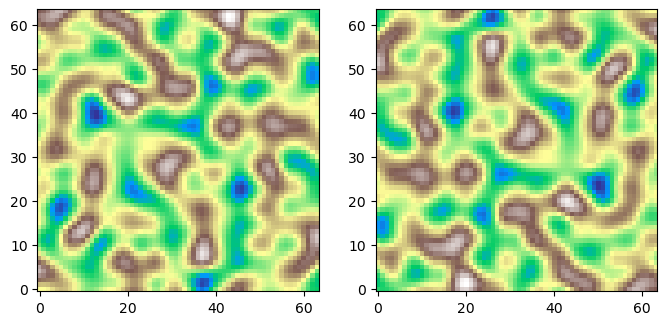

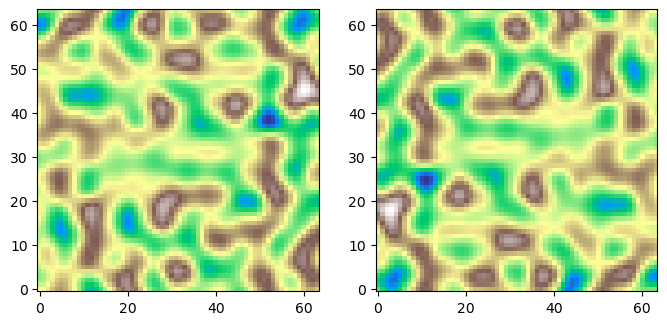

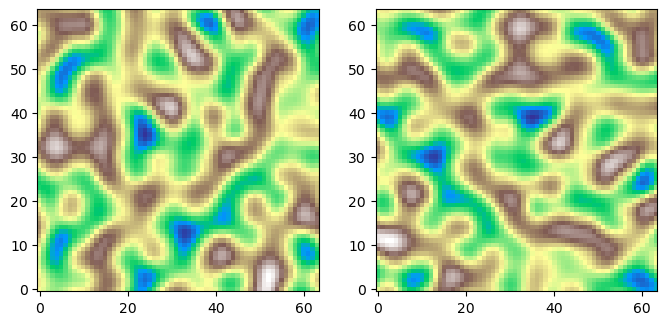

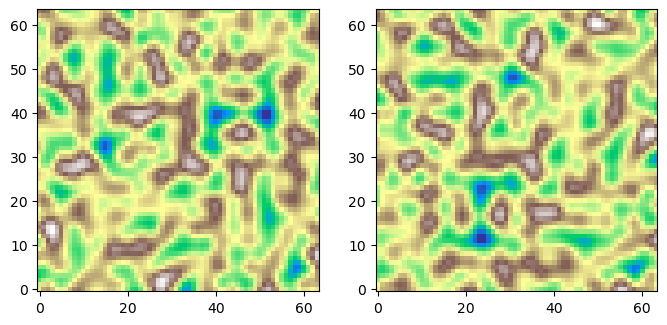

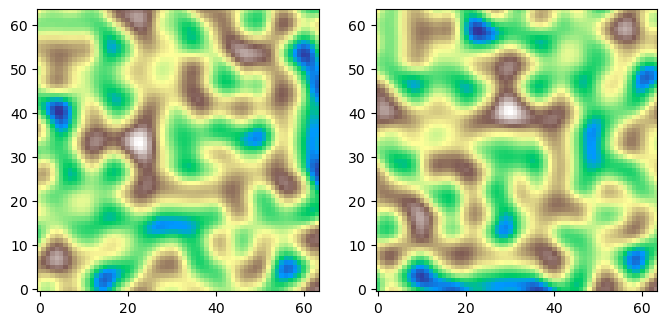

In [6]:
number_grids = 64
save_folder = "../data/raw_datasets"
sim_numbers = range(1, 80+1)

store_augmented_data_folder = "../data/augmented_data"

for sim_number in sim_numbers:
    sim = Simulation.load_simulation(save_folder, sim_number, number_grids)

    eps = 0
    
    while eps < 1e-10:

        aug_pipeline = AugmentationPipeline()
        aug_sim = aug_pipeline.transform_simulation(sim)

        eps = np.sum((sim.topography - aug_sim.topography)**2)
    
    if sim_number%10==0:
        fig, axs = plt.subplots(1,2,figsize=(8,4))
        axs[0].imshow(sim.topography, cmap="terrain", origin="lower")
        axs[1].imshow(aug_sim.topography, cmap="terrain", origin="lower")